In [21]:
import os
import pickle
from koala.graph_color import color_lattice
from koala.phase_space import analyse_hk, k_hamiltonian_generator
import numpy as np
from koala.hamiltonian import generate_majorana_hamiltonian
from koala import plotting as pl
from koala.flux_finder import n_to_ujk_flipped, fluxes_from_bonds, find_flux_sector
from matplotlib import pyplot as plt
from scipy import linalg as la
import random
import matplotlib
matplotlib.rcParams.update({'font.size': 13, 'text.usetex': True, 'font.family': 'serif', 'font.serif': ['Computer Modern']})


In [22]:
outliers_location = '/Users/perudornellas/python/imperial/cx1_am_kit/many_systems/outliers.pickle'
with open(outliers_location, 'rb') as f:
    x = pickle.load(f)

Lattice 0 chosen because:  wrong ground state 
-0.5026759968773261


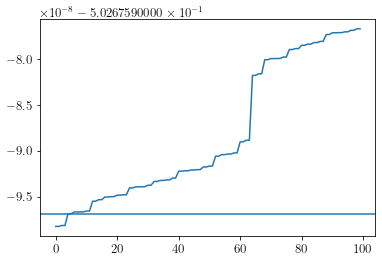

Lattice 1 chosen because:  wrong ground state 
-0.5028166623600322


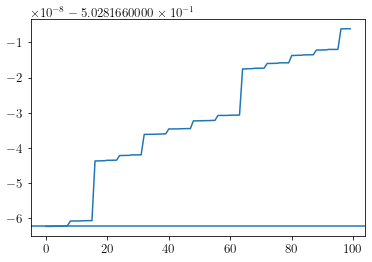

Lattice 2 chosen because:  wrong ground state 
-0.5025339410827503


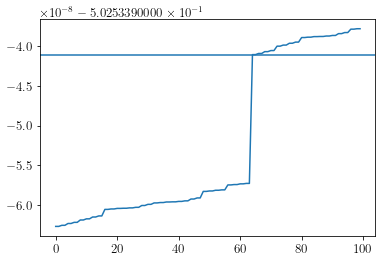

Lattice 3 chosen because:  wrong ground state 
-0.5026605031700231


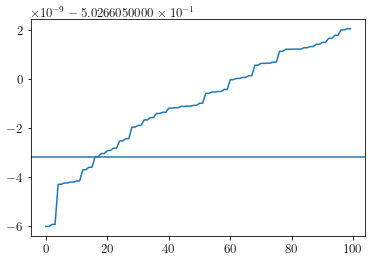

Lattice 4 chosen because:  wrong ground state 
-0.5025294515537201


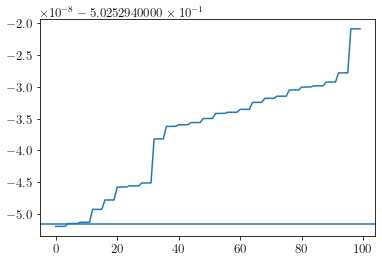

In [25]:
for num,a in enumerate(x):
    print(f'Lattice {num} chosen because: {a[1]}')

    lattice = a[0]['lattice']
    energies = a[0]['energies']
    gaps = a[0]['gaps']
    spanning_tree = a[0]['spanning_tree']
    coloring = color_lattice(lattice)
    J =  np.array([1,0.1,0.1])

    all_sides = np.array([p.n_sides for p in lattice.plaquettes])
    target_flux_sector = -(-1j)**all_sides
    target_flux_sector = target_flux_sector.real + target_flux_sector.imag
    lieb_ujk = find_flux_sector(lattice,target_flux_sector)
    Hk = k_hamiltonian_generator(lattice, coloring, lieb_ujk, J)
    e, g = analyse_hk(Hk, 50)
    print(e - np.min(energies))

    ujk = np.ones(lattice.n_edges)
    winner = np.argmin(energies)
    sort_index = np.argsort(energies)
    winning_ujk = n_to_ujk_flipped(winner, ujk, spanning_tree)



    
    plt.plot(energies[sort_index[:100]])
    plt.axhline(e)
    plt.show()

    if num == 4: break
    
    
